In [128]:
import numpy as np 
import pandas as pd 
from scipy.signal import find_peaks_cwt
from glob import glob 
import matplotlib.pyplot as plt

%matplotlib inline

In [129]:
!ls live/live_*

live/live_1_1.csv live/live_1_2.csv live/live_1_3.csv


In [4]:
bg = np.loadtxt("background.csv", delimiter=",")
calib_wl = np.loadtxt("calib_wl.csv", delimiter=",")

In [8]:
bg = bg.mean(0)

In [11]:
live = np.loadtxt("live/live_1_1.csv", delimiter=",")
live.shape

(691, 1600)

In [12]:
live -= bg

In [13]:
wl = [i for i in range(650, 1001, 10)]

In [15]:
live_interp = []
for l in live:
    live_interp.append(np.interp(wl, calib_wl, l))

In [18]:
live_interp = np.asarray(live_interp)

In [19]:
live_interp.shape

(691, 36)

In [137]:
# select the reflectance within 660-950
# live_filter = np.where((calib_wl > 660) & (calib_wl < 950))
# live_crop = live[:, live_filter]

live_crop = live[:, (calib_wl > 600) & (calib_wl < 950)]
live_crop.shape

(691, 1016)

In [106]:
live_crop = live_crop[:, 0, :]
live_crop.shape

(691, 842)

In [107]:
live_crop = live_crop.mean(1)
live_crop = 1 - live_crop/65535
live_crop.shape

(691,)

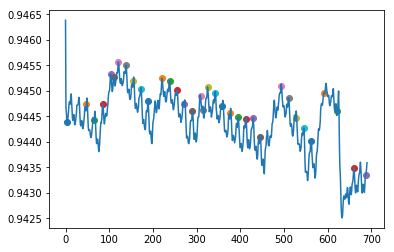

In [108]:
# live_smooth = live_crop
pks = find_peaks_cwt(live_crop, np.arange(1, 20))
plt.plot(live_crop)
for p in pks:
    plt.scatter(p, live_crop[p])

In [109]:
max_index = pks

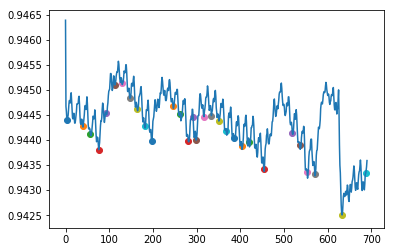

In [110]:
pks = find_peaks_cwt(1-live_crop, np.arange(1, 20))
plt.plot(live_crop)
for p in pks:
    plt.scatter(p, live_crop[p])

In [111]:
min_index = pks

In [117]:
max_index.shape, min_index.shape

((35,), (30,))

In [119]:
live_max = live[max_index].mean(0)

In [120]:
live_min = live[min_index].mean(0)

In [123]:
live_max_interp = np.interp(wl, calib_wl, live_max)
live_min_interp = np.interp(wl, calib_wl, live_min)

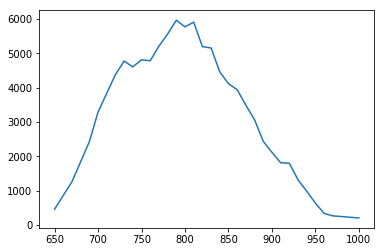

In [125]:
plt.plot(wl, live_max_interp)